In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import (WordCloud, get_single_color_func)

b=["#da0019","#339900","#005799","#bb00be","#011627"]

In [2]:

data_folder = './Data/'
GTD_df = pd.read_csv(data_folder +'GTD.csv',index_col= 0)

# Getting an overview
GTD_df = GTD_df.loc['2004-01-01':'2020-10-01']
col = pd.to_numeric(GTD_df.columns)
categories_df = pd.read_csv(data_folder +'categoriesWparentL3.csv',index_col= 0)

# Keeping only the elements of interest and getting an overview
categories_df = categories_df[categories_df['id'].isin(col)]

predict_gtd = pd.read_csv(data_folder +'predict_gtd.csv',index_col= 0)

mask_baby = np.array(Image.open('./bib.png'))

Parents = [str(categories_df[categories_df['id']==i]['parent'].values)[2:-2] for i in predict_gtd['id0']]
words = [str(categories_df[categories_df['id']==i]['name'].values)[2:-2] for i in predict_gtd['id0']]


def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    
    return freq


s = CountFrequency(Parents)
s = {k: v for k, v in sorted(s.items(), key=lambda item: item[1],reverse=True)}


class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


def CountFreqColor(colorpallete, parent,freqparents,words):
    # Creating an empty dictionary  
    freq = {} 
    color = {}
    for j,item in enumerate(words): 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
            search_key = parent[j]
            list_temp = list(freqparents.items())
            temp =[idx for idx, key in enumerate(list_temp) if key[0] == search_key][0]
            if temp >=len(colorpallete)-1:
                temp = len(colorpallete)-1
            color_temp = colorpallete[temp]
            if color_temp in color:
                color[color_temp].append(item)
            else:
                color[color_temp] = [item] 
            #color[colorpallete[idx for idx, key in enumerate(list(freqparents.items())) if key[0] == parent[j]]] = temp
    
    return freq,color

[words,color] = CountFreqColor(b, Parents,s,words)

# Create and generate a word cloud image:
#wc = WordCloud(relative_scaling=0.8 ,background_color="white",width=1600, height=800,mask=mask_baby,contour_width=0.5, contour_color='steelblue').generate_from_frequencies(words)   #regexp=r"\w[\w' ]+"
wc = WordCloud(relative_scaling=0.8 ,background_color="white",width=500, height=500).generate_from_frequencies(words)   #regexp=r"\w[\w' ]+"

default_color = 'grey'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)




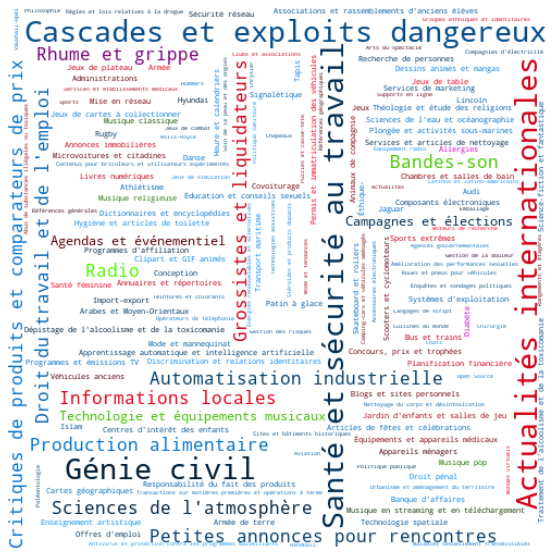

In [3]:
# Display the generated image:
img_size = 30
plt.figure(figsize=(10, 10))#(img_size,img_size*16/9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [4]:

import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import (WordCloud, get_single_color_func)

# External librairies
data_folder = './Data/'
GTD_df = pd.read_csv(data_folder +'GTD.csv',index_col= 0)

# Getting an overview
GTD_df = GTD_df.loc['2004-01-01':'2020-10-01']
col = pd.to_numeric(GTD_df.columns)
categories_df = pd.read_csv(data_folder +'categoriesWparent.csv',index_col= 0)

# Keeping only the elements of interest and getting an overview
categories_df = categories_df[categories_df['id'].isin(col)]

predict_gtd = pd.read_csv(data_folder +'predict_gtd.csv',index_col= 0)


sz=800
x, y = np.ogrid[:sz, :sz]

mask = (x - sz//2) ** 2 + (y - sz//2) ** 2 > 300 ** 2
mask = 255 * mask.astype(int)

Parents = [str(categories_df[categories_df['id']==i]['parent'].values)[2:-2] for i in predict_gtd['id0']]
def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    
    return freq


Parents = CountFrequency(Parents)
Parents = {k: v for k, v in sorted(Parents.items(), key=lambda item: item[1],reverse=True)}
color ={}
for i,item in enumerate(Parents):
    if i >=len(b):
        color_temp = b[len(b)-1]
        color[color_temp].append(item)
    else:
        color_temp = b[i]
        color[color_temp]= [item] 
        

#wc = WordCloud(relative_scaling=1 ,background_color="white",width=800, height=800,mask=mask).generate_from_frequencies(Parents)
wc = WordCloud(relative_scaling=1 ,background_color="white",width=800, height=800).generate_from_frequencies(Parents)



default_color = 'grey'

# Create a color function with single tone
grouped_color_func = SimpleGroupedColorFunc(color, default_color)

# Create a color function with multiple tones
#grouped_color_func = GroupedColorFunc(color, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

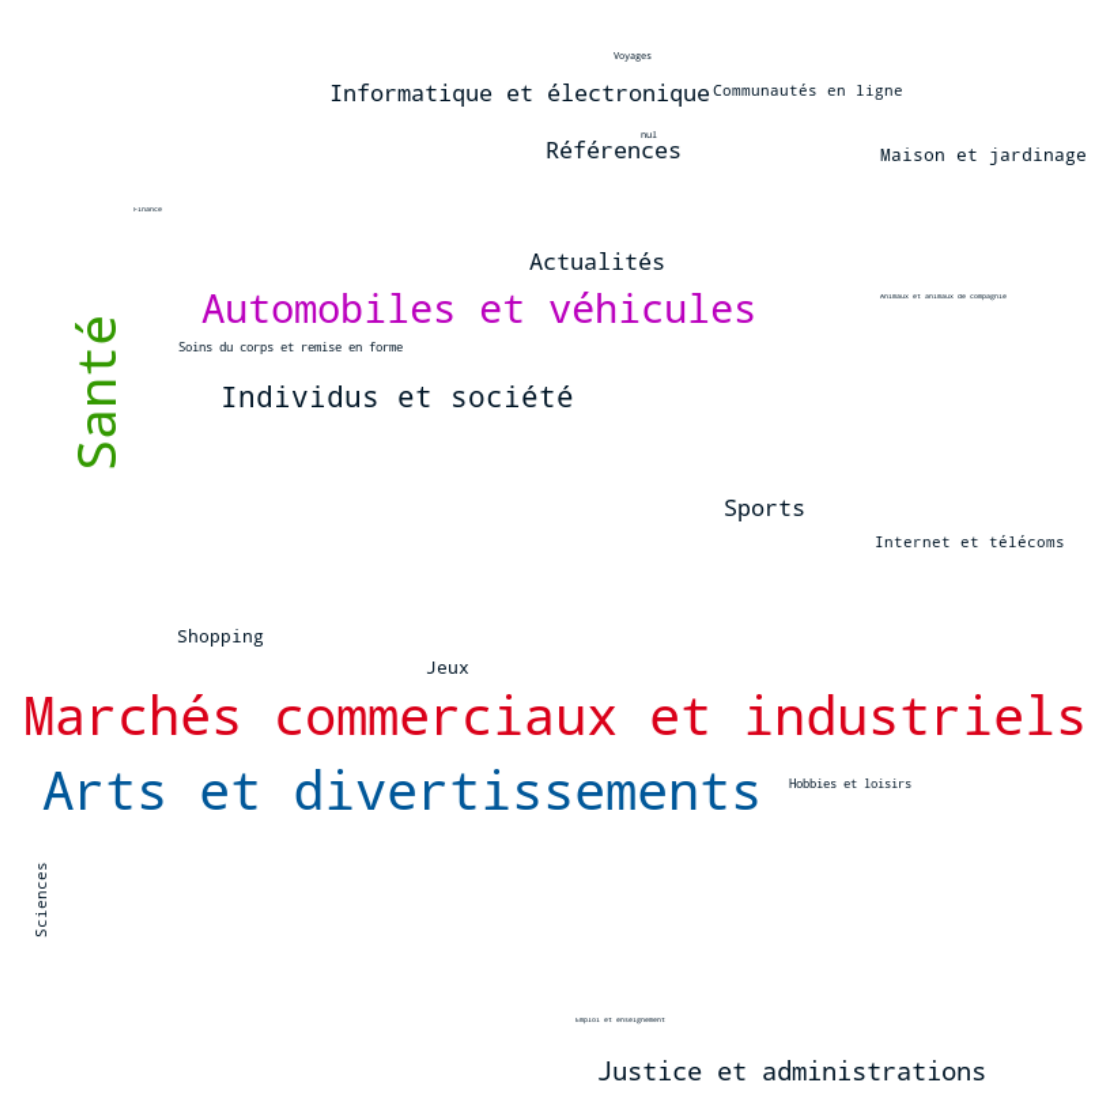

In [5]:
# Display the generated image:
img_size = 20
plt.figure(figsize=(20,20))#figsize=(img_size,img_size*16/9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()